### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Basharat-Asghar/PakWheels-car-Price-Prediction/refs/heads/main/data/pakwheels_cleaned_data.csv')

### Basic  Data Inspection

In [3]:
df.head()

,title,year,fuel,transmission,price_pkr_lacs,mileage_km,engine_numeric,engine_type,company,model,drive_type
0,Porsche Cayenne 2016 S E-Hybrid Platinum Edition,2016,Hybrid,Automatic,235.0,75943,3000.0,ICE,Porsche,Cayenne,NaN
1,Proton X70 2022 Premium FWD,2022,Petrol,Automatic,70.0,12319,1500.0,ICE,Proton,X70,FWD
2,FAW X-PV 2014 Dual AC,2014,Petrol,Manual,7.0,331849,1000.0,ICE,Faw,X-PV,NaN
3,Honda N Wgn 2023 G Turbo,2023,Petrol,Automatic,40.0,25762,660.0,ICE,Honda,N Wgn,NaN
4,Suzuki Wagon R 2017 VXR,2017,Petrol,Manual,17.5,147219,1000.0,ICE,Suzuki,Wagon R,NaN


In [4]:
df.shape

(76314, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76314 entries, 0 to 76313
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           76314 non-null  object 
 1   year            76314 non-null  int64  
 2   fuel            76314 non-null  object 
 3   transmission    76314 non-null  object 
 4   price_pkr_lacs  76176 non-null  float64
 5   mileage_km      76314 non-null  int64  
 6   engine_numeric  76306 non-null  float64
 7   engine_type     76314 non-null  object 
 8   company         76314 non-null  object 
 9   model           76191 non-null  object 
 10  drive_type      1605 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.4+ MB


In [6]:
df.describe()

,year,price_pkr_lacs,mileage_km,engine_numeric
count,76314.000000,76176.000000,76314.000000,76306.000000
mean,2013.934743,49.772515,95001.653589,1385.790308
std,8.826076,71.424725,91303.118078,745.511872
min,1900.000000,1.300000,1.000000,20.000000
25%,2008.000000,17.100000,39000.000000,1000.000000
50%,2016.000000,31.750000,81000.000000,1300.000000
75%,2021.000000,54.000000,125000.000000,1600.000000
max,2025.000000,1295.000000,1000000.000000,6898.000000


In [7]:
df.columns

Index(['title', 'year', 'fuel', 'transmission', 'price_pkr_lacs', 'mileage_km',
       'engine_numeric', 'engine_type', 'company', 'model', 'drive_type'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
title,0
year,0
fuel,0
transmission,0
price_pkr_lacs,138
mileage_km,0
engine_numeric,8
engine_type,0
company,0
model,123


In [9]:
round((df.isnull().sum() / len(df)) * 100, 2)

,0
title,0.00
year,0.00
fuel,0.00
transmission,0.00
price_pkr_lacs,0.18
mileage_km,0.00
engine_numeric,0.01
engine_type,0.00
company,0.00
model,0.16


In [10]:
df1 = df.copy()

In [11]:
df1.drop('drive_type', axis=1, inplace=True)

In [12]:
df1 = df1.dropna(subset=['price_pkr_lacs', 'engine_numeric', 'model'])
print(df1.isna().sum())

title             0
year              0
fuel              0
transmission      0
price_pkr_lacs    0
mileage_km        0
engine_numeric    0
engine_type       0
company           0
model             0
dtype: int64


In [13]:
df1.shape

(76168, 10)

In [14]:
df1.duplicated().sum()

np.int64(12634)

In [15]:
df1.drop_duplicates(keep='first', inplace=True)

In [16]:
df1.shape

(63534, 10)

In [17]:
df1.duplicated().sum()

np.int64(0)

### UniVariate EDA

In [18]:
num_cols = df1.select_dtypes(exclude='object').columns
num_cols

Index(['year', 'price_pkr_lacs', 'mileage_km', 'engine_numeric'], dtype='object')

In [19]:
cat_cols = df1.select_dtypes(include='object').columns
cat_cols = cat_cols[1:]
cat_cols

Index(['fuel', 'transmission', 'engine_type', 'company', 'model'], dtype='object')

In [20]:
def num_uni_eda(df,col):
  sns.histplot(data=df, x=col)
  plt.title(f"Distribution of {col}")
  plt.show()

  sns.boxplot(data=df, x=col)
  plt.title(col)
  plt.show()

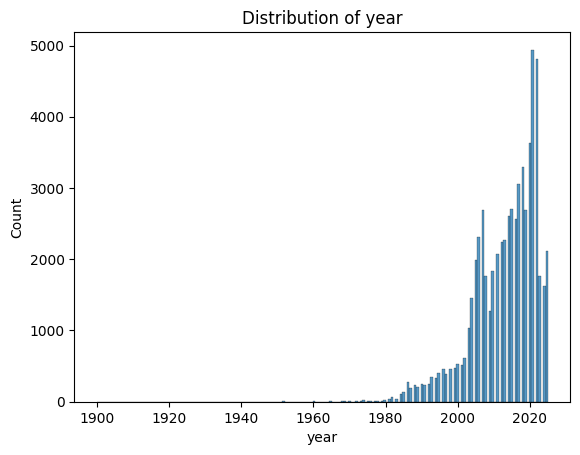

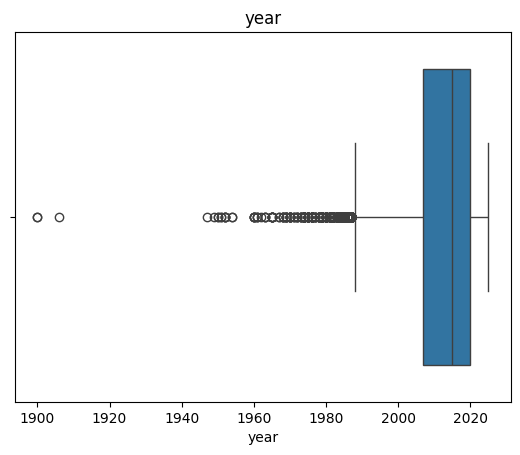

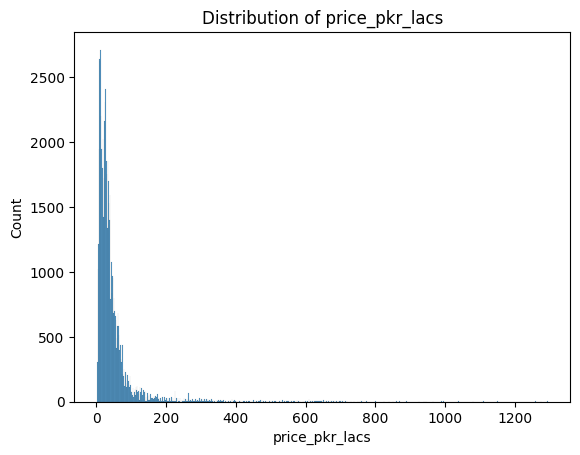

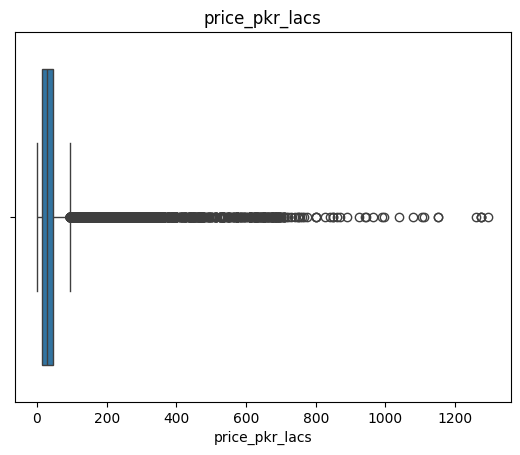

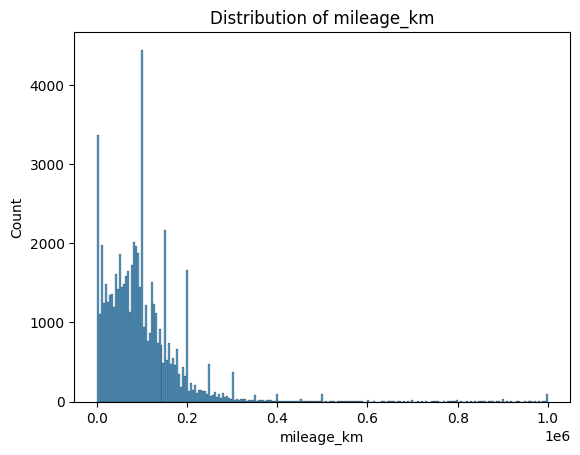

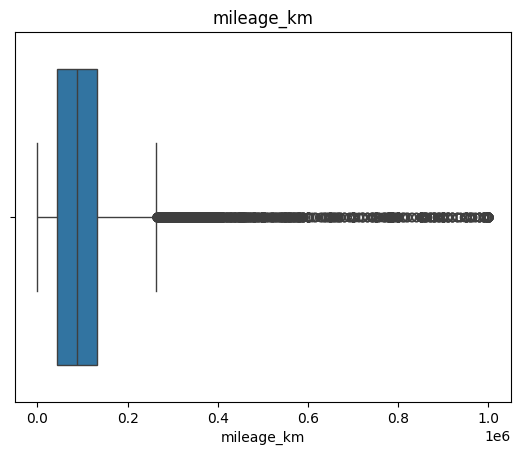

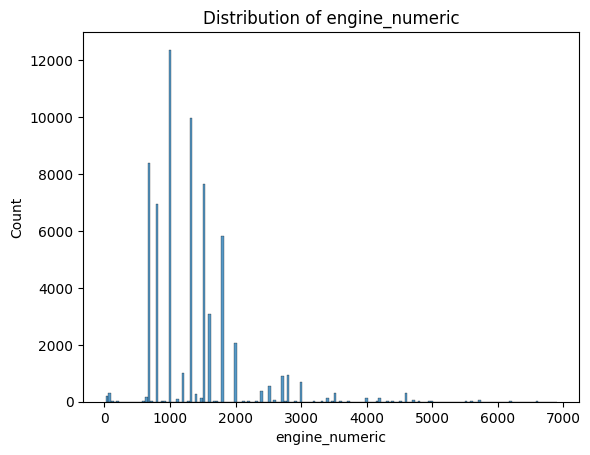

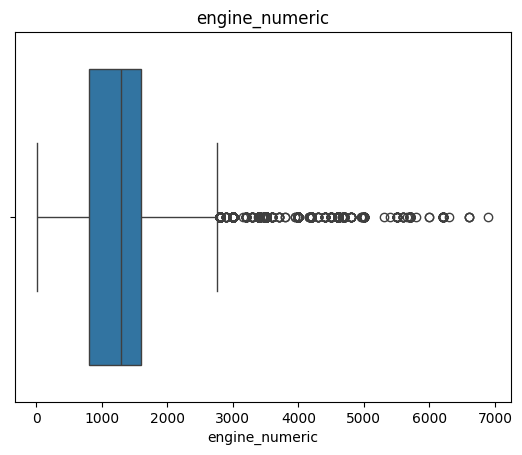

In [21]:
for col in num_cols:
  num_uni_eda(df1,col)

Dropping total 48 entries which are before 1970, as they do not add much value.

In [22]:
df1 = df1[df1['year'] >= 1980]

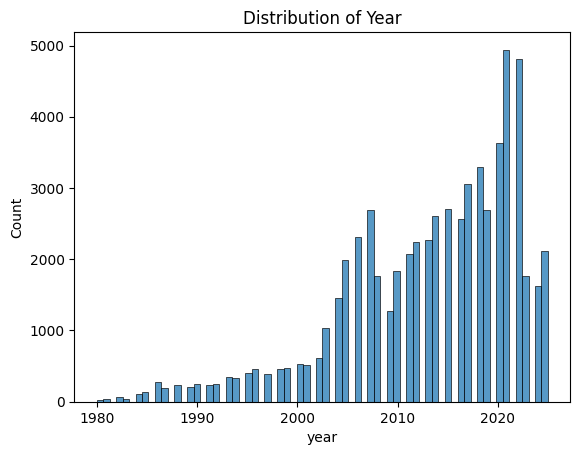

In [23]:
sns.histplot(data=df1, x='year')
plt.title("Distribution of Year")
plt.show()

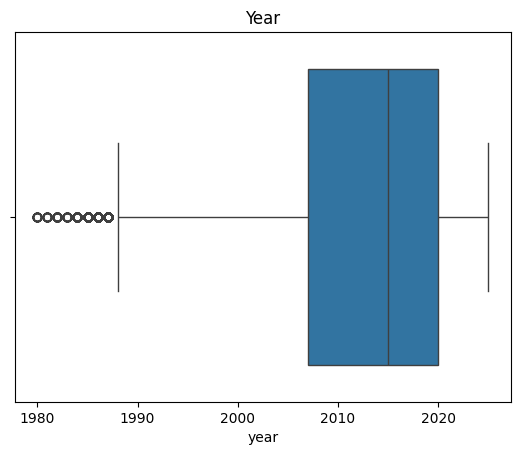

In [24]:
sns.boxplot(data=df1, x='year')
plt.title("Year")
plt.show()

Defining minimum and maximum bounds for the Mileage to get realistic mileage.

In [25]:
def clean_mileage(df,year_col='year',mileage_col='mileage_km'):
  current_year = datetime.now().year

  def min_mileage(year):
    car_age = current_year - year
    return min(car_age * 1000, 5000)

  def max_mileage(year):
    car_age = current_year - year
    return min((car_age + 1) * 25000, 500000)

  df['min_mileage_allowed'] = df[year_col].apply(min_mileage)
  df['max_mileage_allowed'] = df[year_col].apply(max_mileage)

  df[mileage_col] = df[[mileage_col, 'min_mileage_allowed']].max(axis=1)
  df[mileage_col] = df[[mileage_col, 'max_mileage_allowed']].min(axis=1)

  df.drop(columns=['min_mileage_allowed', 'max_mileage_allowed'], inplace=True)

  return df

In [26]:
df2 = clean_mileage(df1, year_col='year', mileage_col='mileage_km')

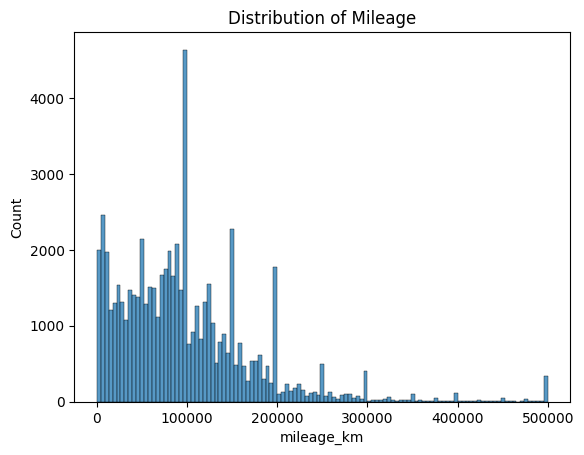

In [27]:
sns.histplot(data=df2, x='mileage_km')
plt.title("Distribution of Mileage")
plt.show()

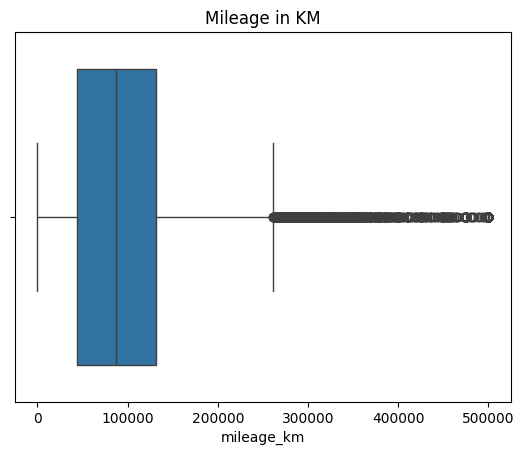

In [28]:
sns.boxplot(data=df2, x='mileage_km')
plt.title("Mileage in KM")
plt.show()

In [29]:
df2.shape

(63390, 10)

In [30]:
def cat_countplt(df,col):
  sns.countplot(data=df, y=col)
  plt.title(f"# of Cars per {col} Category")
  plt.show()

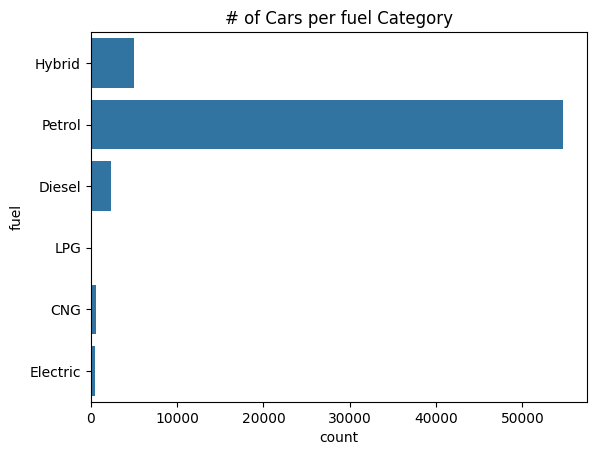

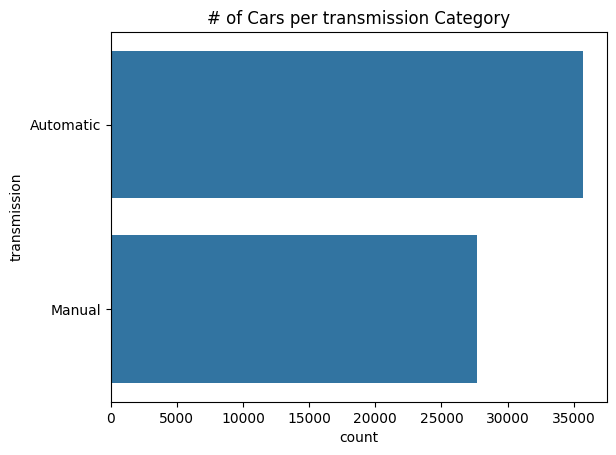

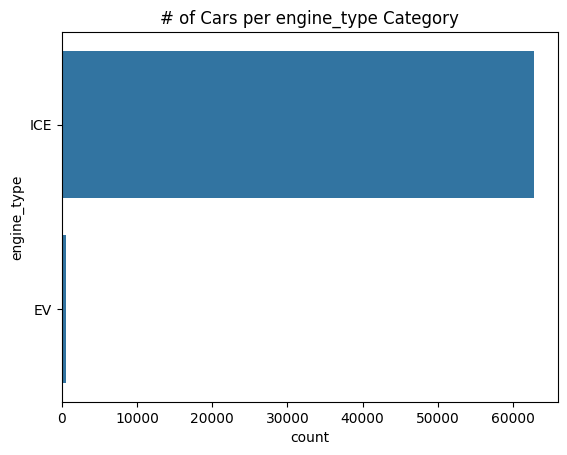

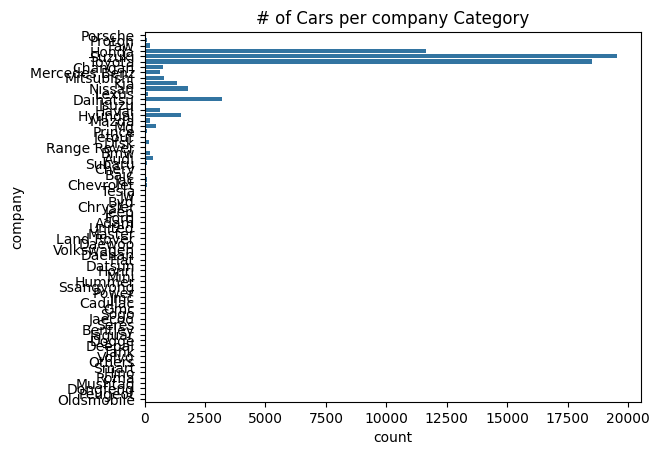

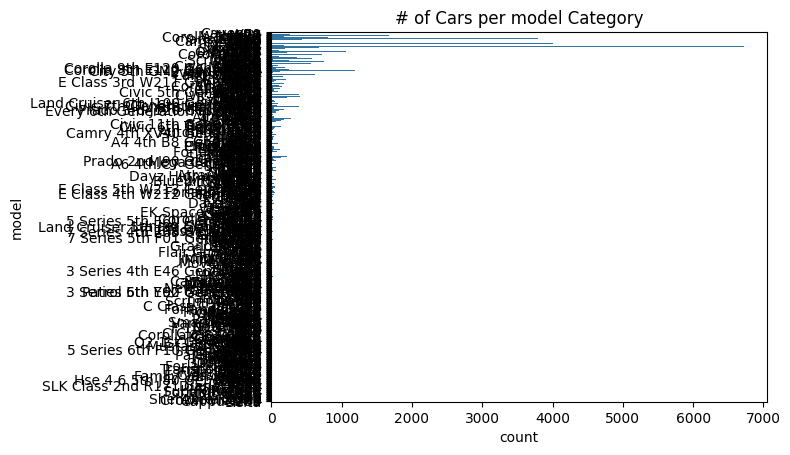

In [31]:
for col in cat_cols:
  cat_countplt(df2,col)

In [32]:
for col in cat_cols:
  print(df2[col].value_counts())

fuel
Petrol      54712
Hybrid       4973
Diesel       2354
CNG           654
Electric      534
LPG           163
Name: count, dtype: int64
transmission
Automatic    35703
Manual       27687
Name: count, dtype: int64
engine_type
ICE    62856
EV       534
Name: count, dtype: int64
company
Suzuki        19535
Toyota        18485
Honda         11633
Daihatsu       3201
Nissan         1778
              ...  
Smart             1
Roma              1
Mushtaq           1
Peugeot           1
Oldsmobile        1
Name: count, Length: 69, dtype: int64
model
Corolla       6718
Mehran        4611
Alto          4009
Cultus        3799
Civic         3595
              ... 
300 Series       1
Celerio          1
Lj80             1
Smart            1
Delta            1
Name: count, Length: 536, dtype: int64


In [33]:
df2['fuel'] = df2['fuel'].replace(['CNG', 'LPG', 'Electric'], 'Other')
df2['fuel'].value_counts()

,count
fuel,
Petrol,54712
Hybrid,4973
Diesel,2354
Other,1351


In [34]:
df2['engine_cc'] = df2.apply(lambda x: x['engine_numeric'] if x['engine_type']=='ICE' else None, axis=1)
df2['battery_kwh'] = df2.apply(lambda x: x['engine_numeric'] if x['engine_type']=='EV' else None, axis=1)

In [35]:
df2.drop(columns=['engine_numeric'], axis=1, inplace=True)
df2.head()

,title,year,fuel,transmission,price_pkr_lacs,mileage_km,engine_type,company,model,engine_cc,battery_kwh
0,Porsche Cayenne 2016 S E-Hybrid Platinum Edition,2016,Hybrid,Automatic,235.0,75943,ICE,Porsche,Cayenne,3000.0,NaN
1,Proton X70 2022 Premium FWD,2022,Petrol,Automatic,70.0,12319,ICE,Proton,X70,1500.0,NaN
2,FAW X-PV 2014 Dual AC,2014,Petrol,Manual,7.0,300000,ICE,Faw,X-PV,1000.0,NaN
3,Honda N Wgn 2023 G Turbo,2023,Petrol,Automatic,40.0,25762,ICE,Honda,N Wgn,660.0,NaN
4,Suzuki Wagon R 2017 VXR,2017,Petrol,Manual,17.5,147219,ICE,Suzuki,Wagon R,1000.0,NaN


In [36]:
df2['engine_cc'] = df2['engine_cc'].fillna(0)
df2['battery_kwh'] = df2['battery_kwh'].fillna(0)

In [37]:
df2['company'].nunique()

69

In [38]:
df3 = df2.copy()

In [39]:
company_count = df3['company'].value_counts()
df3['company'] = df3['company'].apply(lambda x: x if company_count[x] >= 40 else 'Other')

In [40]:
df3['company'].nunique()

31

In [41]:
df3['model'].nunique()

536

In [42]:
model_counts = df3['model'].value_counts()

# Quick look at top 20 models
print(model_counts.head(20))

# How many unique models
print("Unique models:", df3['model'].nunique())

model
Corolla                    6718
Mehran                     4611
Alto                       4009
Cultus                     3799
Civic                      3595
City                       2278
Wagon R                    1673
Vitz                       1507
City 5th GM2 Generation    1187
Swift                      1081
Bolan                      1068
Mira                       1067
Raize                      1012
Passo                       810
Hilux                       804
Vezel                       748
Sportage                    742
Prado                       721
Yaris Sedan                 709
Cuore                       682
Name: count, dtype: int64
Unique models: 536


In [43]:
cum_percentage = model_counts.cumsum() / model_counts.sum() * 100
print(cum_percentage.head(145))  # first 30 to inspect

model
Corolla       10.597886
Mehran        17.871904
Alto          24.196245
Cultus        30.189304
Civic         35.860546
                ...    
Terios Kid    94.937687
Exclusive     94.997634
EK X          95.057580
Harrier       95.117526
Grace         95.175895
Name: count, Length: 145, dtype: float64


In [44]:
# Find cutoff
coverage = 95  # target percentage
cutoff = model_counts[model_counts.cumsum() <= (coverage/100)*len(df3)].min()

print(f"Suggested threshold: {cutoff} listings")


Suggested threshold: 38 listings


In [45]:
df3['model'] = df3['model'].apply(
    lambda x: x if model_counts[x] >= cutoff else 'Other'
)

In [46]:
df3['model'].nunique()

145

In [47]:
df3.head()

,title,year,fuel,transmission,price_pkr_lacs,mileage_km,engine_type,company,model,engine_cc,battery_kwh
0,Porsche Cayenne 2016 S E-Hybrid Platinum Edition,2016,Hybrid,Automatic,235.0,75943,ICE,Porsche,Other,3000.0,0.0
1,Proton X70 2022 Premium FWD,2022,Petrol,Automatic,70.0,12319,ICE,Proton,X70,1500.0,0.0
2,FAW X-PV 2014 Dual AC,2014,Petrol,Manual,7.0,300000,ICE,Faw,X-PV,1000.0,0.0
3,Honda N Wgn 2023 G Turbo,2023,Petrol,Automatic,40.0,25762,ICE,Honda,N Wgn,660.0,0.0
4,Suzuki Wagon R 2017 VXR,2017,Petrol,Manual,17.5,147219,ICE,Suzuki,Wagon R,1000.0,0.0


### Bivariate Analysis
Price vs Year (lineplot)

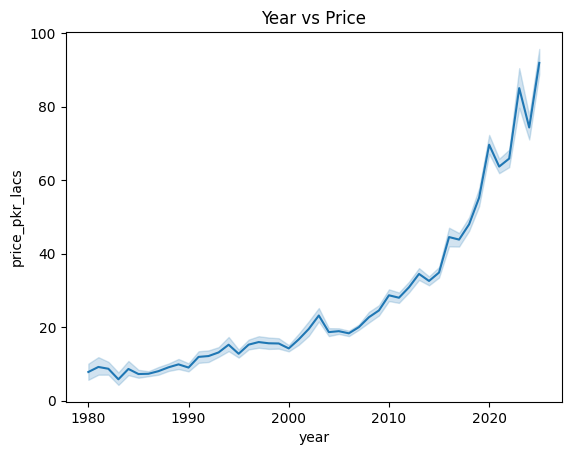

In [48]:
sns.lineplot(data=df3, x='year', y='price_pkr_lacs')
plt.title("Year vs Price")
plt.show()

In [49]:
df3.shape

(63390, 11)

Price vs Mileage

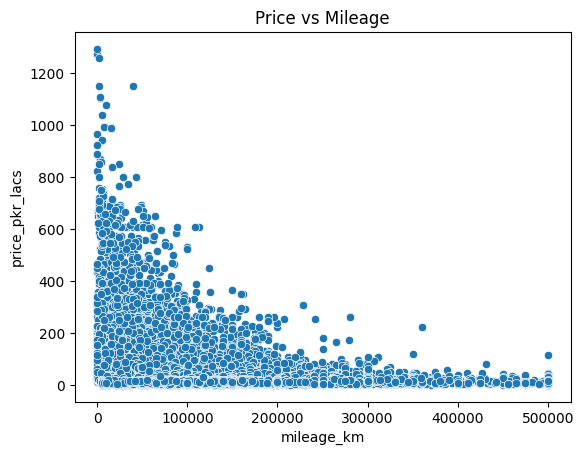

In [50]:
sns.scatterplot(data=df3, y='price_pkr_lacs', x='mileage_km')
plt.title("Price vs Mileage")
plt.show()

higher mileage → lower price (cars with more kilometers driven depreciate).

Price vs Engine size

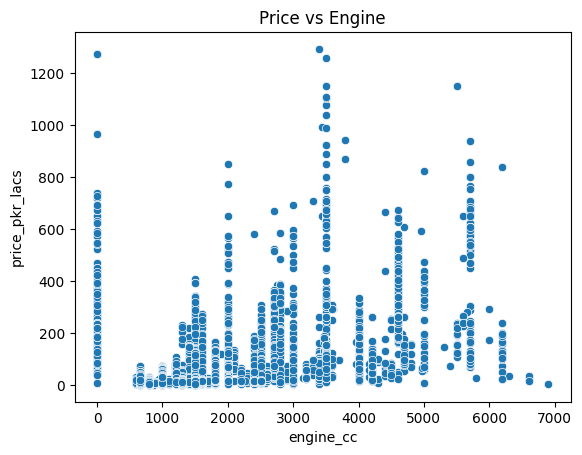

In [51]:
sns.scatterplot(data=df3, y='price_pkr_lacs', x='engine_cc')
plt.title("Price vs Engine")
plt.show()

engine values which shows 0 are missing values.

Price vs Transmission/Fuel/Company (boxplots/violin plots).

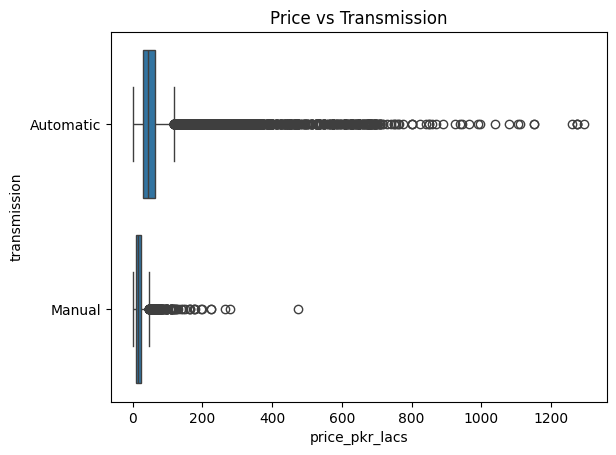

In [52]:
sns.boxplot(data=df3, x='price_pkr_lacs', y='transmission')
plt.title("Price vs Transmission")
plt.show()

Correlation heatmap (numerical features only).

In [53]:
num_col = df3.select_dtypes(exclude='object').columns
num_col

Index(['year', 'price_pkr_lacs', 'mileage_km', 'engine_cc', 'battery_kwh'], dtype='object')

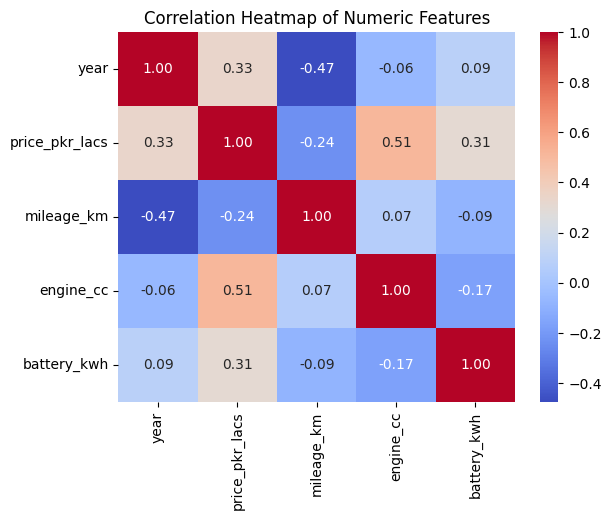

In [54]:
sns.heatmap(df3[num_col].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

 Price variation across brands.

In [58]:
price_company = df3.groupby('company')['price_pkr_lacs'].agg(['count', 'mean', 'median']).sort_values('mean', ascending=False)
price_company.head(10)

,count,mean,median
company,,,
Lexus,152,368.938289,245.00
Porsche,52,344.458654,352.00
Range Rover,51,344.049020,415.00
Ford,44,294.904545,299.00
Bmw,215,211.932558,129.00
Audi,340,146.343941,138.00
Byd,67,129.541045,93.25
Mercedes Benz,654,121.578654,75.00
Haval,630,109.862508,114.00


premium brands cost more as compared to normal brands.

Price variation across models.

In [59]:
price_model = df3.groupby('model')['price_pkr_lacs'].agg(['count', 'mean', 'median']).sort_values('mean', ascending=False)
price_model.head(10)

,count,mean,median
model,,,
LX Series,75,613.913333,610.00
7 Series,47,409.244681,575.00
Land Cruiser,620,272.045387,262.75
Prado,721,197.309015,215.00
e-tron,92,193.500000,190.00
S Class,54,156.368519,129.50
Fortuner,525,147.358476,148.00
A5,62,134.650806,142.00
Santa Fe,49,130.992857,133.00


Creating new feature car age.

In [62]:
current_year = datetime.now().year
df3['car_age'] = current_year - df3['year']
df3.head()

,title,year,fuel,transmission,price_pkr_lacs,mileage_km,engine_type,company,model,engine_cc,battery_kwh,car_age
0,Porsche Cayenne 2016 S E-Hybrid Platinum Edition,2016,Hybrid,Automatic,235.0,75943,ICE,Porsche,Other,3000.0,0.0,9
1,Proton X70 2022 Premium FWD,2022,Petrol,Automatic,70.0,12319,ICE,Proton,X70,1500.0,0.0,3
2,FAW X-PV 2014 Dual AC,2014,Petrol,Manual,7.0,300000,ICE,Faw,X-PV,1000.0,0.0,11
3,Honda N Wgn 2023 G Turbo,2023,Petrol,Automatic,40.0,25762,ICE,Honda,N Wgn,660.0,0.0,2
4,Suzuki Wagon R 2017 VXR,2017,Petrol,Manual,17.5,147219,ICE,Suzuki,Wagon R,1000.0,0.0,8


In [76]:
from scipy import stats
df3['boxcox_mileage'], lam = stats.boxcox(df3['mileage_km'] + 1)
print("Lambda used:", lam)

Lambda used: 0.438823914764675


<Axes: xlabel='boxcox_mileage', ylabel='Count'>

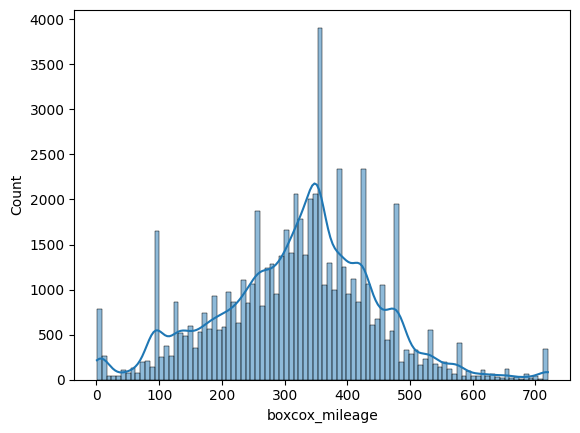

In [77]:
sns.histplot(df3, x='boxcox_mileage', kde=True)

In [81]:
df3.drop('title', axis=1, inplace=True)
df3.head()

,year,fuel,transmission,price_pkr_lacs,mileage_km,engine_type,company,model,engine_cc,battery_kwh,car_age,boxcox_mileage
0,2016,Hybrid,Automatic,235.0,75943,ICE,Porsche,Other,3000.0,0.0,9,313.502884
1,2022,Petrol,Automatic,70.0,12319,ICE,Proton,X70,1500.0,0.0,3,139.877942
2,2014,Petrol,Manual,7.0,300000,ICE,Faw,X-PV,1000.0,0.0,11,574.756158
3,2023,Petrol,Automatic,40.0,25762,ICE,Honda,N Wgn,660.0,0.0,2,194.220223
4,2017,Petrol,Manual,17.5,147219,ICE,Suzuki,Wagon R,1000.0,0.0,8,419.939567


In [83]:
df3.to_csv('cleaned_df.csv', index=False)